In [1]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
iris_data=pd.read_csv('IRIS.csv')

In [3]:
iris_data

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,virginica
146,147,6.3,2.5,5.0,1.9,virginica
147,148,6.5,3.0,5.2,2.0,virginica
148,149,6.2,3.4,5.4,2.3,virginica


In [4]:
iris_data['Species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [5]:
iris_data.isnull().values.any()

False

In [6]:
iris_data['Species'].value_counts()

Species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

<Axes: xlabel='Species', ylabel='count'>

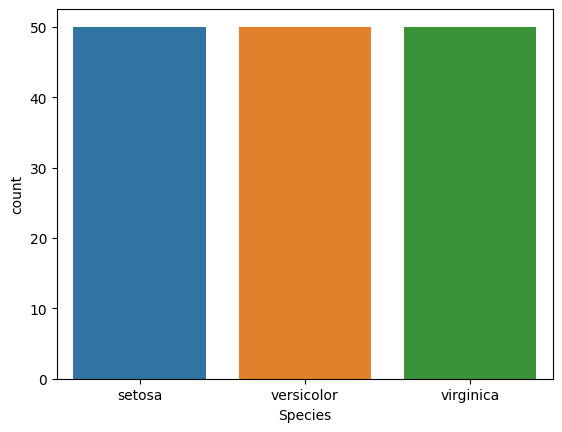

In [11]:
    iris_data['Species'] = iris_data['Species'].astype('category')

# Plot countplot
sns.countplot(data=iris_data, x='Species')

<Axes: xlabel='Sepal.Length', ylabel='Sepal.Width'>

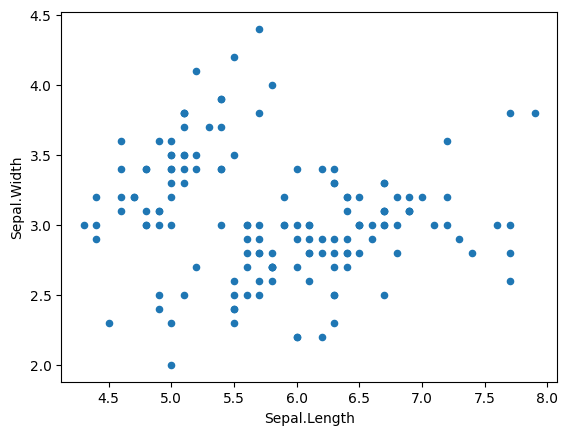

In [19]:
iris_data.plot(kind='scatter',x='Sepal.Length',y='Sepal.Width')

In [24]:
sns.set_style('whitegrid')
sns.facegrid(iris_data,hue='Species',size=6).map(plt.scatter,'Sepal.Length','Sepal.Width').add_legend()

AttributeError: module 'seaborn' has no attribute 'facegrid'

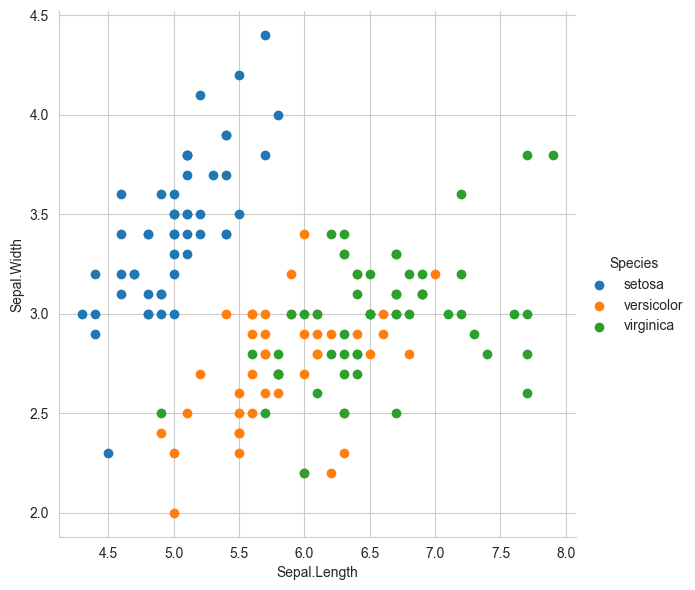

In [26]:
sns.set_style('whitegrid')

# Create a FacetGrid
g = sns.FacetGrid(iris_data, hue='Species', height=6)

# Use scatter plot
g.map(plt.scatter, 'Sepal.Length', 'Sepal.Width')
g.add_legend()

c:\users\sarth\appdata\local\programs\python\python38\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


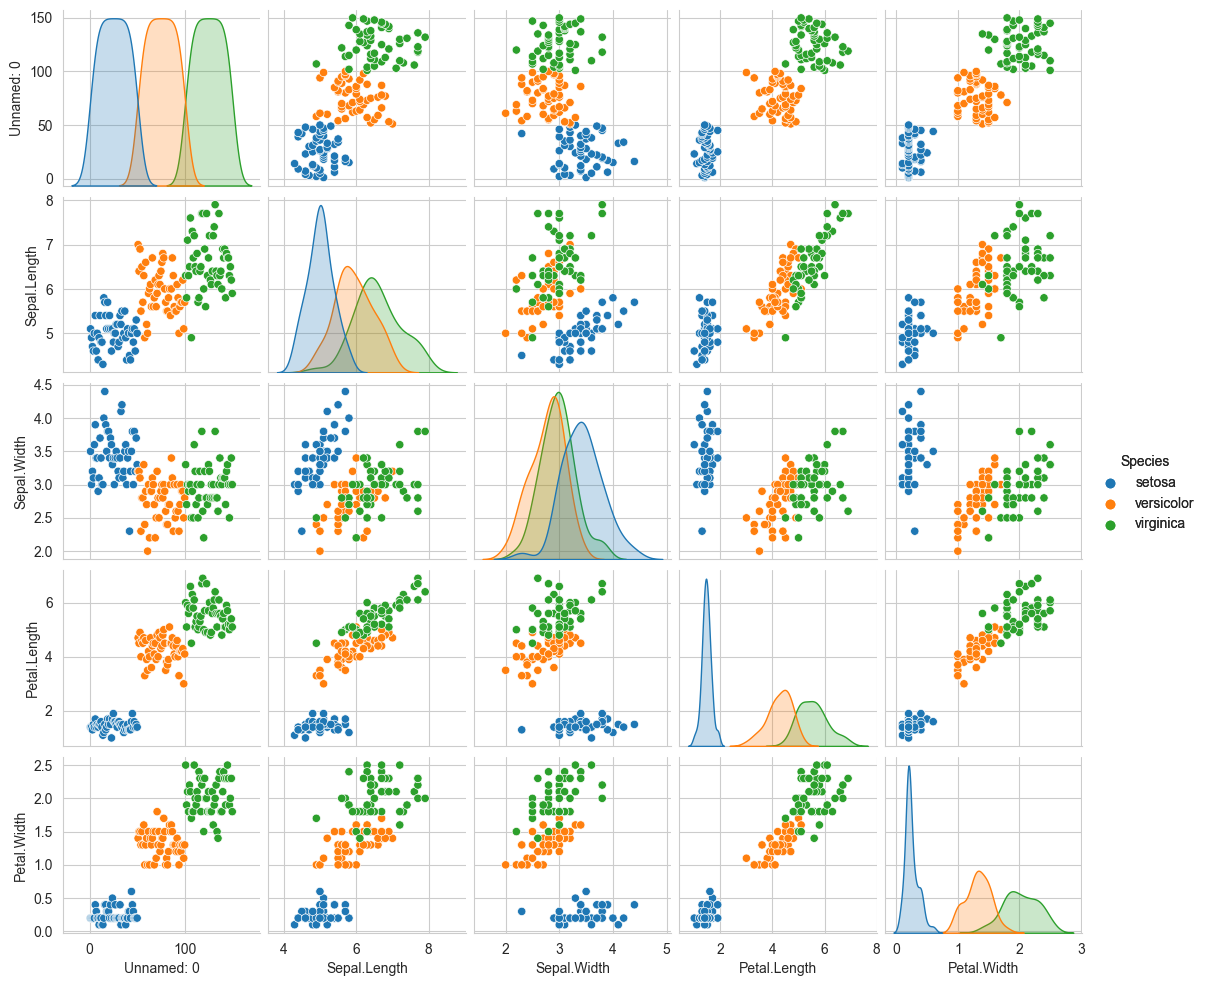

In [27]:
sns.pairplot(iris_data,hue='Species',size=2).add_legend()

In [28]:
for column in iris_data.columns:
    if iris_data[column].dtype==np.number:
        continue
iris_data[column]=LabelEncoder().fit_transform(iris_data[column])


C:\Users\sarth\AppData\Local\Temp\ipykernel_10644\3526263569.py:2: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if iris_data[column].dtype==np.number:


In [29]:
iris_data.dtypes

Unnamed: 0        int64
Sepal.Length    float64
Sepal.Width     float64
Petal.Length    float64
Petal.Width     float64
Species           int32
dtype: object

In [32]:
iris_data.head()

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [34]:
X=iris_data.drop(['Species'],axis=1)
Y=iris_data['Species']

In [35]:
X

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2
...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3
146,147,6.3,2.5,5.0,1.9
147,148,6.5,3.0,5.2,2.0
148,149,6.2,3.4,5.4,2.3


In [36]:
Y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int32

In [37]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.2)

In [38]:
k_range=list(range(1,12))
acc=[]
for i in k_range:
    knn=KNeighborsClassifier(n_neighbors=i).fit(X_train,Y_train)
    Y_pred=knn.predict(X_test)
    acc.append(metrics.accuracy_score(Y_test,Y_pred))
    

In [39]:
acc

[1.0,
 0.9666666666666667,
 1.0,
 0.9666666666666667,
 1.0,
 0.9333333333333333,
 0.9666666666666667,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333]

In [40]:
knn=KNeighborsClassifier(n_neighbors=i).fit(X_train,Y_train)
Y_pred=knn.predict(X_test)

In [41]:
metrics.accuracy_score(Y_test,Y_pred)

0.9333333333333333